# 1 - Business Problem

- We will consider the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+disease)
- In this example we will concentrate on attempting to distinguish presence (values 1,2,3,4) from absence (value 0)

# 2 - Importing required libraries

In [1]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show xgboost

Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show xgboost

Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ray 2.0.0 requires click<=8.0.4,>=7.0, but you have click 8.1.7 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show mlflow

Name: mlflow
Version: 2.4.1
Summary: MLflow: A Platform for ML Development and Productionization
Home-page: https://mlflow.org/
Author: Databricks
Author-email: 
License: Apache License 2.0
Location: /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages
Requires: alembic, click, cloudpickle, databricks-cli, docker, entrypoints, Flask, gitpython, gunicorn, importlib-metadata, Jinja2, markdown, matplotlib, numpy, packaging, pandas, protobuf, pyarrow, pytz, pyyaml, querystring-parser, requests, scikit-learn, scipy, sqlalchemy, sqlparse
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 35.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: mlflow
    Found existing installation: mlflow 2.4.1
    Uninstalling mlflow-2.4.1:
      Successfully uninstalled mlflow-2.4.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip show mlflow

Name: mlflow
Version: 2.12.1
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: 
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.
        
                                        Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, 

In [ ]:
# restart kernel
# kernel operations - restart kernel

In [1]:
import xgboost
import mlflow
from mlflow.tracking.client import MlflowClient
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter("ignore")

# 3 - Configuring the experiment

In [3]:
import mlflow
mlflow.set_experiment(experiment_name="heart-condition-classifier")

2024/05/06 18:35:15 INFO mlflow.tracking.fluent: Experiment with name 'heart-condition-classifier' does not exist. Creating a new experiment.


<Experiment: artifact_location='', creation_time=1715020515944, experiment_id='4f849020-438f-4387-b0b7-f9fd1e288612', last_update_time=None, lifecycle_stage='active', name='heart-condition-classifier', tags={}>

# 4- Exploring data

In [4]:
import pandas as pd

In [5]:
file_url = "https://azuremlexampledata.blob.core.windows.net/data/heart-disease-uci/data/heart.csv"
df = pd.read_csv(file_url)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [9]:
df['thal'].nunique()

5

In [10]:
df['thal'].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [11]:
df['thal'] = df['thal'].astype("category").cat.codes

In [12]:
df['thal'].unique()

array([2, 3, 4, 0, 1], dtype=int8)

In [13]:
# split dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], test_size=0.3)

# 5 - Training the model

In [14]:
mlflow.xgboost.autolog()

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [17]:
run = mlflow.start_run()

In [18]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# 6 - Logging extra metrics

In [20]:
y_pred = model.predict(X_test)

2024/05/06 19:29:07 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': 'e4989678dcc38be868fcab1adfbac03e', 'request': '55bbe238723b6119'}, 'Environment': 'westus', 'Location': 'westus', 'Time': '2024-05-06T19:29:07.81202+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


In [22]:
from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

2024/05/06 19:31:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during xgboost autologging: UserError: Resource Conflict: ArtifactId ExperimentRun/dcid.ea676045-88e5-4a1b-a1db-1634c1a42f95/metric_info.json already exists.


In [23]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 76.92%
Recall: 51.61%


In [24]:
mlflow.end_run()

# 7 - Exploring experiment with MLFlow

In [26]:
run = mlflow.get_run(run.info.run_id)

In [27]:
pd.DataFrame(data=[run.data.params], index=["Value"]).T

,Value
objective,binary:logistic
base_score,None
booster,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,None
eval_metric,logloss
gamma,None
grow_policy,None


In [28]:
pd.DataFrame(data=[run.data.metrics], index=["Value"]).T

,Value
validation_0-logloss,0.571872
accuracy_score_X_test,0.769231
accuracy_score-2_X_test,0.769231
recall_score_X_test,0.516129


In [29]:
client = mlflow.tracking.MlflowClient()

In [31]:
client.list_artifacts(run_id=run.info.run_id)

[<FileInfo: file_size=-1, is_dir=False, path='feature_importance_weight.json'>,
 <FileInfo: file_size=-1, is_dir=False, path='feature_importance_weight.png'>,
 <FileInfo: file_size=-1, is_dir=False, path='metric_info.json'>,
 <FileInfo: file_size=-1, is_dir=True, path='model'>]

In [32]:
file_path = mlflow.artifacts.download_artifacts(
    run_id=run.info.run_id,
    artifact_path="feature_importance_weight.png",
    dst_path="./data")

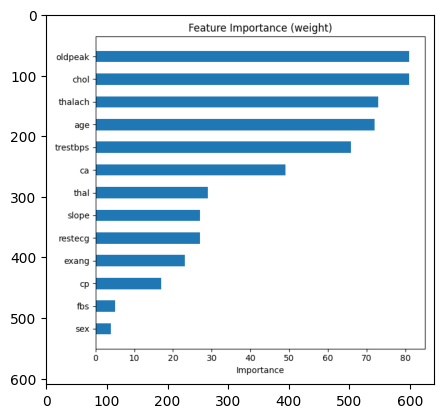

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread(file_path)
plt.imshow(image)
plt.show()

In [34]:
file_path = mlflow.artifacts.download_artifacts(
    run_id=run.info.run_id,
    artifact_path="mode",
    dst_path="./data")

# 8 - Loading the model back

In [36]:
classifier = mlflow.xgboost.load_model(f"runs:/{run.info.run_id}/model")

In [37]:
type(classifier)

xgboost.sklearn.XGBClassifier

In [38]:
classifier.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

# 9 - Logging models with preprocessing

In [39]:
# Reload the dataset
df = pd.read_csv(file_url)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"], test_size=0.3
)

### Use encoder

In [41]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [42]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

encoder = ColumnTransformer(
    [
        ("cat_encoding", OrdinalEncoder(categories="auto", encoded_missing_value=np.nan,), ["thal"],)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
pipeline = Pipeline(steps=[("encoding", encoder), ("model", model)])

In [45]:
pipeline

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoding',
                                                  OrdinalEncoder(), ['thal'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categori...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Signitures

In [46]:
from mlflow.models import infer_signature

signature = infer_signature(X_test, y_test)

In [47]:
signature

inputs: 
  ['age': long (required), 'sex': long (required), 'cp': long (required), 'trestbps': long (required), 'chol': long (required), 'fbs': long (required), 'restecg': long (required), 'thalach': long (required), 'exang': long (required), 'oldpeak': double (required), 'slope': long (required), 'ca': long (required), 'thal': string (required)]
outputs: 
  ['target': long (required)]
params: 
  None

### Log pipeline model

In [49]:
with mlflow.start_run() as run:
    pipeline.fit(X_train, y_train)
    mlflow.sklearn.log_model(pipeline, artifact_path="pipeline", signature=signature)

In [50]:
pipeline_model = mlflow.sklearn.load_model(f"runs:/{run.info.run_id}/pipeline")

In [51]:
type(pipeline_model)

sklearn.pipeline.Pipeline

In [52]:
pipeline_model.predict(X_test)

2024/05/06 21:19:20 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '5e3d9ae35d18a368c1e02024fdb32b77', 'request': '2f89f27f64de8fd8'}, 'Environment': 'westus', 'Location': 'westus', 'Time': '2024-05-06T21:19:20.2413527+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0])